# Experiment 2 

### Group Members :  (Aayush Malde - 1911090, Aditya Malwade - 1911091, Rahul Panchal - 1911097)

#### Preparing and loading the housing dataset from the 'housing.csv' file.

In [ ]:
import numpy as np
import pandas as pd

housing_dataframe = pd.read_csv("housing.csv")
print("Shape of the datafame: ",housing_dataframe.shape)
housing_dataframe.head(10)

Shape of the datafame:  (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


## 1) Imputation

Imputation is the process of replacing missing data with substituted values.

We use imputation process of preprocessing because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved while training.

### a) Using threshold of 70%

In [ ]:
housing_dataframe.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

#### Finding missing rate value for rows

In [ ]:
housing_dataframe.isnull().mean(axis = 1).head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

#### Changing the values of rows having the missing rate less than 0.7

In [ ]:
threshold_for_imputation = 0.7

# removing columns with missing value rate higher than 70%
housing_dataframe = housing_dataframe[housing_dataframe.columns[housing_dataframe.isnull().mean() < threshold_for_imputation]]

# removing rows with missing value rate higher than 70%
housing_dataframe = housing_dataframe.loc[housing_dataframe.isnull().mean(axis=1)  < threshold_for_imputation]

housing_dataframe.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


#### Since The number of row and columns remain the same there are no such rows or columns having missing value rate greater than 70%

### b) Using Numerical Imputation

#### All the column values are numerical except for the last column ocean_proximity not all values can be 0 we will preferably fill the cells haiving value NA with the median of the column

#### Printing all the rows having Nan values in them

In [ ]:
temp_df = housing_dataframe[housing_dataframe.isna().any(axis = 1)]
print("Shape of the na value rows: ",temp_df.shape)
temp_df.head(10)

Shape of the na value rows:  (207, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
738,-122.14,37.67,37,3342,NaN,1635,557,4.7933,186900,NEAR BAY
1097,-121.77,39.66,20,3759,NaN,1705,600,4.7120,158600,INLAND
1350,-121.95,38.03,5,5526,NaN,3207,1012,4.0767,143100,INLAND
1456,-121.98,37.96,22,2987,NaN,1420,540,3.6500,204100,INLAND
1493,-122.01,37.94,23,3741,NaN,1339,499,6.7061,322300,NEAR BAY


#### We can se from above statement we have received rows having Nan values

#### Below we will write a statement to change Nan values to replace them with median values

In [ ]:
housing_dataframe = housing_dataframe.fillna(housing_dataframe.median())

#### Checking if there are any more rows having Nan values

In [ ]:
housing_dataframe[housing_dataframe.isna().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


#### We know the that the ocean_proximity is a categorical column

In [ ]:
housing_dataframe[housing_dataframe['ocean_proximity'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


#### We can see that none of the rows are empty in the dataset.
#### If there would have been any row having Nan we would have used categorical imputation and filled Nan values with the maximum value occuring in the column

## 2) Handling Outliers 

### Method - Outlier Detection with Standard Deviation

#### Considering value of factor x as 2

In [ ]:
factor = 2

### Finding upper lmit value for each column

In [ ]:
upper_limit = housing_dataframe.mean() + factor * housing_dataframe.std()
print(upper_limit)

longitude               -115.562641
latitude                  39.903766
housing_median_age        53.810602
total_rooms             6998.993585
total_bedrooms          1380.640693
population              3690.400988
households              1264.199186
median_income              7.670314
median_house_value    437647.048658
dtype: float64


### Finding lower limit value for each column

In [ ]:
lower_limit = housing_dataframe.mean() - factor * housing_dataframe.std()
lower_limit

longitude              -123.576768
latitude                 31.359957
housing_median_age        3.468371
total_rooms           -1727.467422
total_bedrooms         -304.899588
population             -839.447499
households             -265.119825
median_income             0.071028
median_house_value   -23935.414840
dtype: float64

### Removing the rows with outliners and storing in temporary dataframe

In [ ]:
temp_df_std = housing_dataframe.select_dtypes(['float','number'])
numerical_columns = list(temp_df_std.columns.values)
# print(numerical_columns)

temp_df_std = housing_dataframe.copy()

print("The shape of the temp_df_std before removing ouliners: ",temp_df_std.shape[0])

for i in numerical_columns:
    temp_df_std = temp_df_std[(temp_df_std[i] < upper_limit[i]) & (temp_df_std[i] > lower_limit[i])]

print("The number of rows after removing outliners:",temp_df_std.shape[0])
print("The shape of the temp_df_std: ",temp_df_std.shape[0])
temp_df_std.head(5)

The shape of the temp_df_std before removing ouliners:  20640
The number of rows after removing outliners: 17113
The shape of the temp_df_std:  17113


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


### Calculating percentile for outlier detection 

In [ ]:
upper_lim_percentile = housing_dataframe.quantile(0.95)
upper_lim_percentile

longitude               -117.080000
latitude                  38.960000
housing_median_age        52.000000
total_rooms             6213.200000
total_bedrooms          1271.000000
population              3288.000000
households              1162.000000
median_income              7.300305
median_house_value    489810.000000
Name: 0.95, dtype: float64

In [ ]:
lower_lim_percentile = housing_dataframe.quantile(0.05)
lower_lim_percentile

longitude              -122.47000
latitude                 32.82000
housing_median_age        8.00000
total_rooms             620.95000
total_bedrooms          138.00000
population              348.00000
households              125.00000
median_income             1.60057
median_house_value    66200.00000
Name: 0.05, dtype: float64

### b) Dropping the outlier rows

In [ ]:
temp_df_percentile_drop = housing_dataframe.copy()
print("The shape of temp_df_percentile_drop: ",temp_df_percentile_drop.shape)
#numerical columns already defined in above cell
for i in numerical_columns:
    temp_df_percentile_drop = temp_df_percentile_drop[(temp_df_percentile_drop[i] < upper_lim_percentile[i]) & (temp_df_percentile_drop[i] > lower_lim_percentile[i])]
print("The shape of temp_df_percentile_drop: ",temp_df_percentile_drop.shape)
temp_df_percentile_drop.head(10)

The shape of temp_df_percentile_drop:  (20640, 10)
The shape of temp_df_percentile_drop:  (11291, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
15,-122.26,37.85,50,1120,283.0,697,264,2.1250,140000,NEAR BAY
18,-122.26,37.84,50,2239,455.0,990,419,1.9911,158700,NEAR BAY
21,-122.27,37.85,42,1639,367.0,929,366,1.7135,159800,NEAR BAY
26,-122.28,37.85,49,1130,244.0,607,239,2.4597,93800,NEAR BAY
28,-122.28,37.84,50,2082,492.0,1131,473,1.6424,108900,NEAR BAY
30,-122.28,37.84,49,1916,447.0,863,378,1.9274,122300,NEAR BAY
32,-122.27,37.84,48,1922,409.0,1026,335,1.7969,110400,NEAR BAY
34,-122.27,37.83,51,2665,574.0,1258,536,2.7303,109700,NEAR BAY
46,-122.26,37.83,50,1125,322.0,616,304,2.0260,142500,NEAR BAY


### c) Capping the outlier rows

In [ ]:
temp_df_percentile_cap = housing_dataframe.copy()
print(numerical_columns)
print("The shape of temp_df_percentile_cap: ",temp_df_percentile_cap.shape)
#numerical columns already defined in above cell
for i in numerical_columns:
    temp_df_percentile_cap.loc[(temp_df_percentile_cap[i] > upper_lim_percentile[i]),i] = upper_lim_percentile[i]
    temp_df_percentile_cap.loc[(temp_df_percentile_cap[i] < lower_lim_percentile[i]),i] = lower_lim_percentile[i]
print("The shape of temp_df_percentile_cap: ",temp_df_percentile_cap.shape)
temp_df_percentile_cap.head(10)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
The shape of temp_df_percentile_cap:  (20640, 10)
The shape of temp_df_percentile_cap:  (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,138.0,348.0,126.0,7.300305,452600.0,NEAR BAY
1,-122.22,37.86,21.0,6213.2,1106.0,2401.0,1138.0,7.300305,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257400,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643100,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846200,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.036800,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.659100,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.120000,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.080400,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.691200,261100.0,NEAR BAY


## 3) Binning

#### importing dependenices

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpls

### Implemented Fixed Width Binning

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


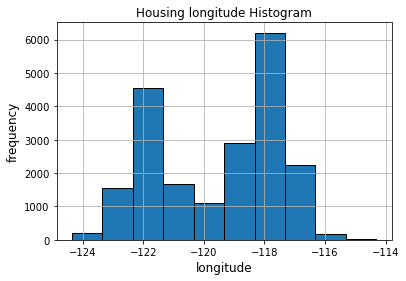

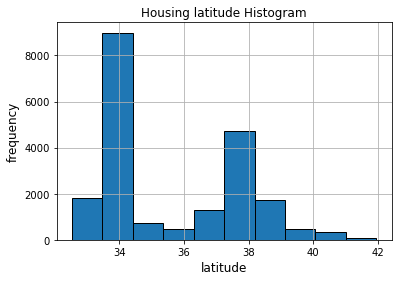

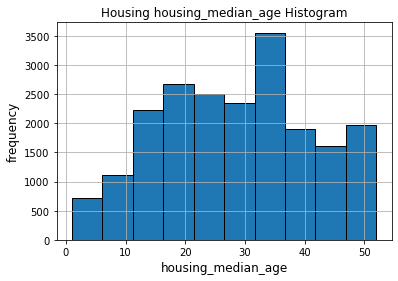

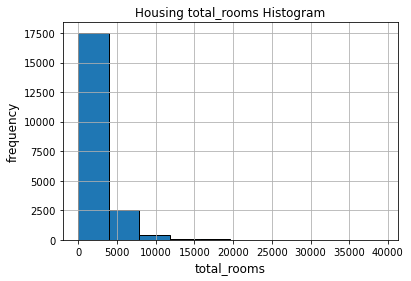

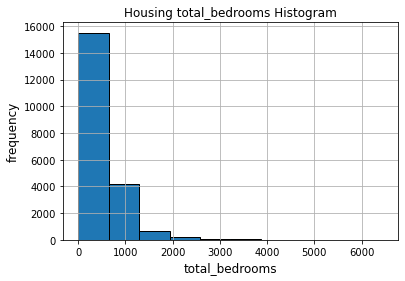

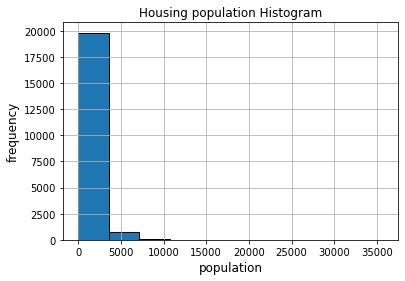

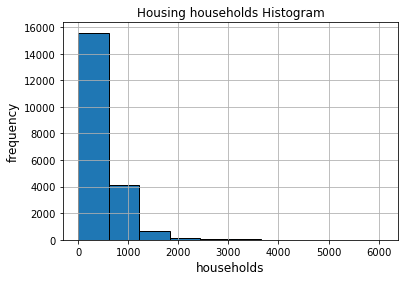

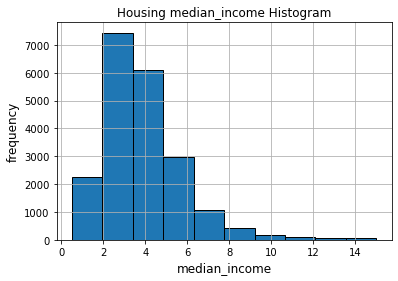

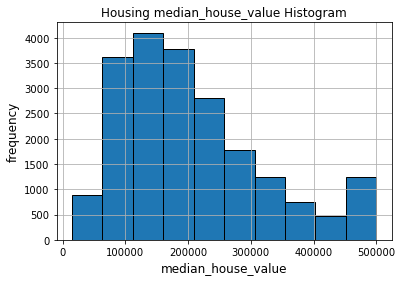

In [ ]:
print(numerical_columns)
for i in numerical_columns:
    fig, ax = plt.subplots()
    housing_dataframe[i].hist(edgecolor="black", linewidth=1)
    ax.set_title("Housing "+i+" Histogram", fontsize=12)
    ax.set_xlabel(i,fontsize=12)
    ax.set_ylabel("frequency", fontsize=12)

In [ ]:
for i in numerical_columns:
    housing_dataframe[i+"_bin_round"] = np.array(np.floor(np.array(housing_dataframe[i]) / 10.))
housing_dataframe.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_bin_round,latitude_bin_round,housing_median_age_bin_round,total_rooms_bin_round,total_bedrooms_bin_round,population_bin_round,households_bin_round,median_income_bin_round,median_house_value_bin_round
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,-13.0,3.0,4.0,88.0,12.0,32.0,12.0,0.0,45260.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,-13.0,3.0,2.0,709.0,110.0,240.0,113.0,0.0,35850.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,-13.0,3.0,5.0,146.0,19.0,49.0,17.0,0.0,35210.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,-13.0,3.0,5.0,127.0,23.0,55.0,21.0,0.0,34130.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,-13.0,3.0,5.0,162.0,28.0,56.0,25.0,0.0,34220.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,-13.0,3.0,5.0,91.0,21.0,41.0,19.0,0.0,26970.0
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,-13.0,3.0,5.0,253.0,48.0,109.0,51.0,0.0,29920.0
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,-13.0,3.0,5.0,310.0,68.0,115.0,64.0,0.0,24140.0
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,-13.0,3.0,4.0,255.0,66.0,120.0,59.0,0.0,22670.0
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,-13.0,3.0,5.0,354.0,70.0,155.0,71.0,0.0,26110.0


## 4) Log Transform

In [ ]:
for i in numerical_columns:
    housing_dataframe[i+'_log'] = np.log((1 + abs(housing_dataframe[i])))
    print(housing_dataframe[['ocean_proximity', i, i+'_log']].head(10))
    print("-"*100)
# housing_dataframe.head(10)
# Since longitude have negative values in it we have considered abs values for calculating log transform

  ocean_proximity  longitude  longitude_log
0        NEAR BAY    -122.23       4.814053
1        NEAR BAY    -122.22       4.813971
2        NEAR BAY    -122.24       4.814134
3        NEAR BAY    -122.25       4.814215
4        NEAR BAY    -122.25       4.814215
5        NEAR BAY    -122.25       4.814215
6        NEAR BAY    -122.25       4.814215
7        NEAR BAY    -122.25       4.814215
8        NEAR BAY    -122.26       4.814296
9        NEAR BAY    -122.25       4.814215
----------------------------------------------------------------------------------------------------
  ocean_proximity  latitude  latitude_log
0        NEAR BAY     37.88      3.660480
1        NEAR BAY     37.86      3.659965
2        NEAR BAY     37.85      3.659708
3        NEAR BAY     37.85      3.659708
4        NEAR BAY     37.85      3.659708
5        NEAR BAY     37.85      3.659708
6        NEAR BAY     37.84      3.659451
7        NEAR BAY     37.84      3.659451
8        NEAR BAY     37.84      3.65

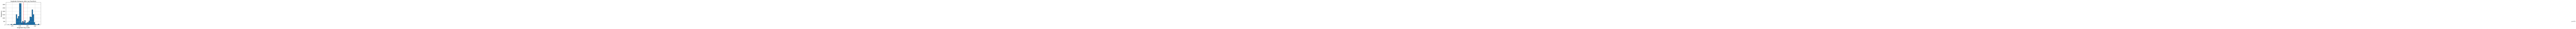

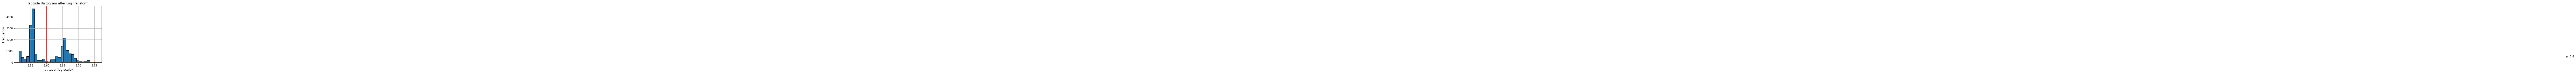

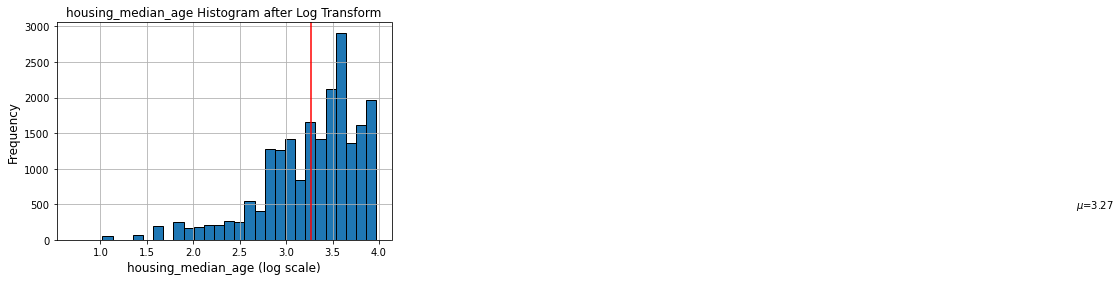

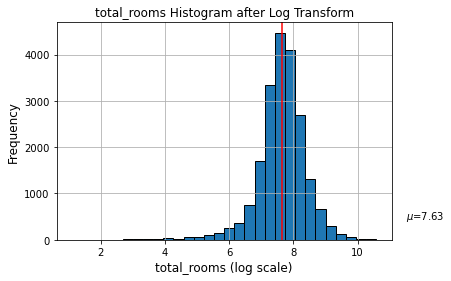

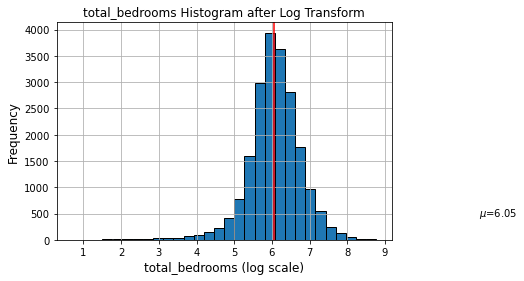

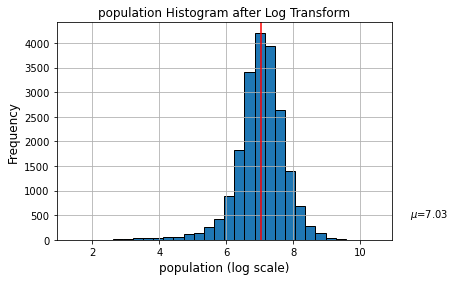

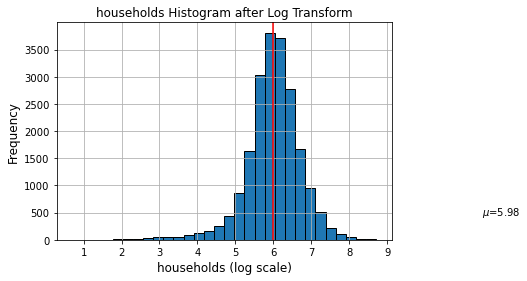

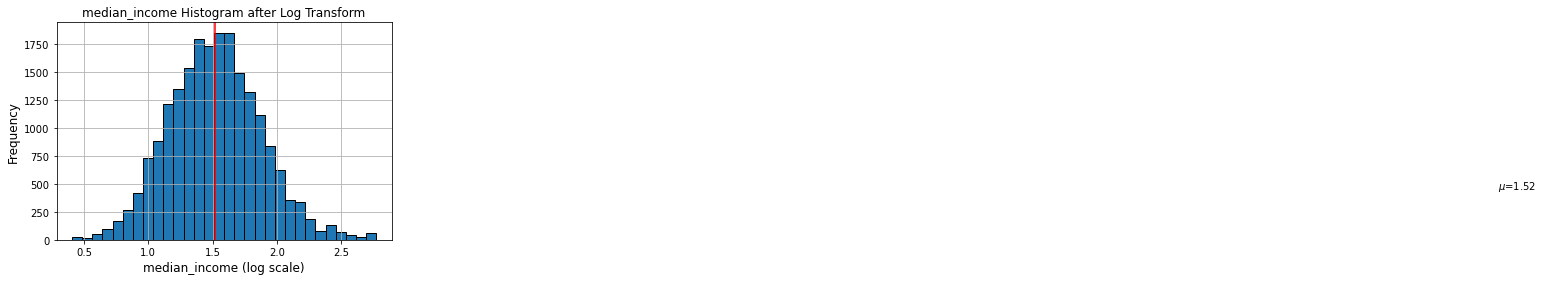

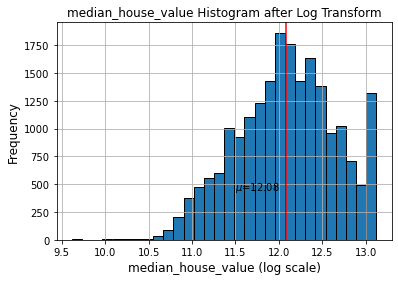

In [ ]:
all_log_mean = {}

for i in numerical_columns:
    temp = np.round(np.mean(housing_dataframe[i+'_log']), 2)
    all_log_mean[i] = temp


for i in numerical_columns:
    fig, ax = plt.subplots()
    housing_dataframe[i+'_log'].hist(bins=30,linewidth = 1, edgecolor = "black")
    plt.axvline(all_log_mean[i], color='r')
    ax.set_title(i+' Histogram after Log Transform', fontsize=12)
    ax.set_xlabel(i+' (log scale)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.text(11.5, 450, r'$\mu$='+str(all_log_mean[i]), fontsize=10)

## 5) One hot encoding

### Implemented using ocean_proximity column

In [ ]:
housing_dataframe[['ocean_proximity']].head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ocean_proximity_label_encoder = LabelEncoder()
ocean_proximity_labels = ocean_proximity_label_encoder.fit_transform(housing_dataframe['ocean_proximity'])
housing_dataframe['ocean_proximity_label'] = ocean_proximity_labels

housing_dataframe_sub = housing_dataframe[['latitude', 'longitude', 'ocean_proximity', 'ocean_proximity_label']]
housing_dataframe.iloc[6667:6687]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,longitude_log,latitude_log,housing_median_age_log,total_rooms_log,total_bedrooms_log,population_log,households_log,median_income_log,median_house_value_log,ocean_proximity_label
6667,-118.10,34.17,44,4505,894.0,2296,899,3.4811,300500,INLAND,...,4.779963,3.560193,3.806662,8.413165,6.796824,7.739359,6.802395,1.499869,12.613206,1
6668,-118.12,34.17,52,2166,483.0,1308,467,3.0417,222600,INLAND,...,4.780131,3.560193,3.970292,7.681099,6.182085,7.177019,6.148468,1.396665,12.313136,1
6669,-118.11,34.16,52,3158,459.0,1229,444,5.4223,325600,INLAND,...,4.780047,3.559909,3.970292,8.058011,6.131226,7.114769,6.098074,1.859776,12.693428,1
6670,-118.11,34.16,52,2489,437.0,1101,438,4.2065,320300,INLAND,...,4.780047,3.559909,3.970292,7.820038,6.082219,7.004882,6.084499,1.649908,12.677016,1
6671,-118.11,34.16,52,1353,274.0,852,306,3.4583,239900,INLAND,...,4.780047,3.559909,3.970292,7.210818,5.616771,6.748760,5.726848,1.494768,12.387982,1
6672,-118.11,34.15,40,1950,509.0,1038,438,2.6172,196100,<1H OCEAN,...,4.780047,3.559625,3.713572,7.576097,6.234411,6.946014,6.084499,1.285700,12.186385,0
6673,-118.11,34.15,26,2193,558.0,1186,559,3.6474,184100,<1H OCEAN,...,4.780047,3.559625,3.295837,7.693482,6.326149,7.079184,6.327937,1.536308,12.123240,0
6674,-118.12,34.15,35,1760,447.0,984,384,3.4167,198200,<1H OCEAN,...,4.780131,3.559625,3.583519,7.473637,6.104793,6.892642,5.953243,1.485393,12.197037,0
6675,-118.12,34.16,52,2218,437.0,1211,422,5.0237,241900,<1H OCEAN,...,4.780131,3.559909,3.970292,7.704812,6.082219,7.100027,6.047372,1.795702,12.396284,0
6676,-118.10,34.16,46,2863,513.0,1412,498,5.3272,330200,INLAND,...,4.779963,3.559909,3.850148,7.959975,6.242223,7.253470,6.212606,1.844858,12.707457,1


In [ ]:
ocean_proximity_ohe = OneHotEncoder()
ocean_proximity_feature_arr = ocean_proximity_ohe.fit_transform(housing_dataframe[['ocean_proximity_label']]).toarray()
ocean_proximity_feature_labels = list(ocean_proximity_label_encoder.classes_)
ocean_proximity_features = pd.DataFrame(ocean_proximity_feature_arr, columns=ocean_proximity_feature_labels)

In [ ]:
ocean_proximity_ohe = pd.concat([housing_dataframe_sub, ocean_proximity_features], axis=1)
columns = sum([['latitude', 'longitude', 'ocean_proximity', 'ocean_proximity_label'],ocean_proximity_feature_labels], [])
ocean_proximity_ohe[columns].iloc[4:10]

,latitude,longitude,ocean_proximity,ocean_proximity_label,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4,37.85,-122.25,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
5,37.85,-122.25,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
6,37.84,-122.25,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
7,37.84,-122.25,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
8,37.84,-122.26,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0
9,37.84,-122.25,NEAR BAY,3,0.0,0.0,0.0,1.0,0.0


In [ ]:
ocean_proximity_onehot_features = pd.get_dummies(housing_dataframe['ocean_proximity'])
pd.concat([housing_dataframe[['latitude', 'longitude', 'ocean_proximity']],ocean_proximity_onehot_features],axis =1 ).iloc[6667:6687]

,latitude,longitude,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6667,34.17,-118.10,INLAND,0,1,0,0,0
6668,34.17,-118.12,INLAND,0,1,0,0,0
6669,34.16,-118.11,INLAND,0,1,0,0,0
6670,34.16,-118.11,INLAND,0,1,0,0,0
6671,34.16,-118.11,INLAND,0,1,0,0,0
6672,34.15,-118.11,<1H OCEAN,1,0,0,0,0
6673,34.15,-118.11,<1H OCEAN,1,0,0,0,0
6674,34.15,-118.12,<1H OCEAN,1,0,0,0,0
6675,34.16,-118.12,<1H OCEAN,1,0,0,0,0
6676,34.16,-118.10,INLAND,0,1,0,0,0


## 6) Scaling

### Importing Dependencies

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

numerical_columns.remove('longitude')
numerical_columns.remove('latitude')

### Implementing Normalization (Min-Max Scaler)

In [ ]:
mms = MinMaxScaler()
for i in numerical_columns:
    housing_dataframe[i+'_minmax'] = mms.fit_transform(housing_dataframe[[i]])
    print(housing_dataframe[[i,i+'_minmax']].iloc[0:10])
    print("-"*100)

   housing_median_age  housing_median_age_minmax
0                  41                   0.784314
1                  21                   0.392157
2                  52                   1.000000
3                  52                   1.000000
4                  52                   1.000000
5                  52                   1.000000
6                  52                   1.000000
7                  52                   1.000000
8                  42                   0.803922
9                  52                   1.000000
----------------------------------------------------------------------------------------------------
   total_rooms  total_rooms_minmax
0          880            0.022331
1         7099            0.180503
2         1467            0.037260
3         1274            0.032352
4         1627            0.041330
5          919            0.023323
6         2535            0.064423
7         3104            0.078895
8         2555            0.064932
9         

In [ ]:
for i in numerical_columns:
    min_for_col = housing_dataframe[i].min()
    max_for_col = housing_dataframe[i].max()
    housing_dataframe[i+'_normalized'] = (housing_dataframe[i]-min_for_col)/(max_for_col - min_for_col)
    print(housing_dataframe[[i,i+'_normalized']].iloc[0:10])
    print("-"*100)

   housing_median_age  housing_median_age_normalized
0                  41                       0.784314
1                  21                       0.392157
2                  52                       1.000000
3                  52                       1.000000
4                  52                       1.000000
5                  52                       1.000000
6                  52                       1.000000
7                  52                       1.000000
8                  42                       0.803922
9                  52                       1.000000
----------------------------------------------------------------------------------------------------
   total_rooms  total_rooms_normalized
0          880                0.022331
1         7099                0.180503
2         1467                0.037260
3         1274                0.032352
4         1627                0.041330
5          919                0.023323
6         2535                0.064423
7   

### Implemented Standard Scaler Method

In [ ]:
ss = StandardScaler()
for i in numerical_columns:
    housing_dataframe[i+'_zscore'] = ss.fit_transform(housing_dataframe[[i]])
    print(housing_dataframe[[i,i+'_zscore']].iloc[0:10])
    print("-"*100)

   housing_median_age  housing_median_age_zscore
0                  41                   0.982143
1                  21                  -0.607019
2                  52                   1.856182
3                  52                   1.856182
4                  52                   1.856182
5                  52                   1.856182
6                  52                   1.856182
7                  52                   1.856182
8                  42                   1.061601
9                  52                   1.856182
----------------------------------------------------------------------------------------------------
   total_rooms  total_rooms_zscore
0          880           -0.804819
1         7099            2.045890
2         1467           -0.535746
3         1274           -0.624215
4         1627           -0.462404
5          919           -0.786942
6         2535           -0.046188
7         3104            0.214634
8         2555           -0.037021
9         

## 7) Grouping Operations

### a) Categorical column grouping

#### As we know ocean_proximity is the column with categories so we will group the data by columns

In [ ]:
housing_dataframe.groupby('ocean_proximity').agg(lambda x: x.value_counts().index[0])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,longitude_bin_round,...,households_normalized,median_income_normalized,median_house_value_normalized,housing_median_age_zscore,total_rooms_zscore,total_bedrooms_zscore,population_zscore,households_zscore,median_income_zscore,median_house_value_zscore
ocean_proximity,,,,,,,,,,,,,,,,,,,,,
<1H OCEAN,-118.31,34.05,36,1582,435.0,891,386,15.0001,500001,-12.0,...,0.063312,1.000000,1.000000,0.584852,-0.483031,-0.242831,-0.471971,-0.296975,5.858286,2.540411
INLAND,-121.30,34.10,17,1717,435.0,782,397,3.1250,112500,-12.0,...,0.050650,0.181039,0.201032,-0.924851,-0.421149,-0.242831,-0.238845,-0.268203,-0.655694,-0.817692
ISLAND,-118.32,33.34,52,2359,214.0,422,431,2.1579,450000,-12.0,...,0.028285,0.160922,0.896906,1.856182,-0.440401,-0.037767,-0.886123,-0.440834,-0.666642,2.107100
NEAR BAY,-122.27,37.78,52,1575,435.0,849,335,2.8750,500001,-13.0,...,0.054925,0.250003,1.000000,1.856182,-0.262547,-0.242831,-0.509060,-0.430371,0.133873,2.540411
NEAR OCEAN,-117.09,32.75,52,2197,435.0,1392,335,15.0001,500001,-12.0,...,0.054925,1.000000,1.000000,1.856182,-0.201123,-0.242831,-0.338630,-0.430371,-0.787288,2.540411


### b) Using pivotal tables

In [ ]:
table = pd.pivot_table(housing_dataframe, values='population', index=['longitude',	'latitude'],columns='housing_median_age', aggfunc=np.sum, fill_value =0)
table.head(5)

housing_median_age  1   2   3   4   5   6   7   8   9   10  ...  43  44  45  \
longitude latitude                                          ...               
-124.35   40.54      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
-124.30   41.80      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
          41.84      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
-124.27   40.69      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   
-124.26   40.58      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   

housing_median_age  46  47  48  49  50  51   52  
longitude latitude                               
-124.35   40.54      0   0   0   0   0   0  806  
-124.30   41.80      0   0   0   0   0   0    0  
          41.84      0   0   0   0   0   0    0  
-124.27   40.69      0   0   0   0   0   0    0  
-124.26   40.58      0   0   0   0   0   0  907  

[5 rows x 52 columns]

## 8) Feature Splitting cannot be perfromed since no such data which can be split

We will use a dummy dataset to show splitting.

In [ ]:
df1 = {
    'State':['Arizona AZ','Georgia GG','Newyork NY','Indiana IN','Florida FL']}

df1 = pd.DataFrame(df1,columns=['State'])
print(df1)

df2 = pd.DataFrame(df1.State.str.split(" ").tolist(), columns="State State_code".split())
print(df2)



        State
0  Arizona AZ
1  Georgia GG
2  Newyork NY
3  Indiana IN
4  Florida FL
     State State_code
0  Arizona         AZ
1  Georgia         GG
2  Newyork         NY
3  Indiana         IN
4  Florida         FL
